In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sb

raw_data = pd.read_csv("Covid Data.csv")
raw_data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [100]:
# Data cleaning
data = raw_data.copy()

# Convert dates to datetimes
data.loc[data['DATE_DIED'] == '9999-99-99', 'DATE_DIED'] = np.nan
data['DATE_DIED'] = pd.to_datetime(data['DATE_DIED'], dayfirst=True)

# Fill in missing pregnancy data for males
data.loc[data["SEX"] == 2, "PREGNANT"] = 2

# Indicate missing data in binary variables, and set missing data to be 0
binary_columns = [name for name in raw_data.columns.to_list() if name not in ['AGE', 'DATE_DIED', 'CLASSIFICATION_FINAL', 'MEDICAL_UNIT']]
data[binary_columns] = data[binary_columns].replace(99, 0).replace(97, 0).astype('Int32')
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU
0,2,1,1,1,2020-05-03,0,1,65,2,2,...,2,2,1,2,2,2,2,2,3,0
1,2,1,2,1,2020-06-03,0,1,72,2,2,...,2,2,1,2,2,1,1,2,5,0
2,2,1,2,2,2020-06-09,1,2,55,2,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,2020-06-12,0,2,53,2,2,...,2,2,2,2,2,2,2,2,7,0
4,2,1,2,1,2020-06-21,0,2,68,2,1,...,2,2,1,2,2,2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,0,2,40,2,2,...,2,2,2,2,2,2,2,2,7,0
1048571,1,13,2,2,NaT,2,2,51,2,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,NaT,0,2,55,2,2,...,2,2,2,2,2,2,2,2,7,0
1048573,2,13,2,1,NaT,0,2,28,2,2,...,2,2,2,2,2,2,2,2,7,0


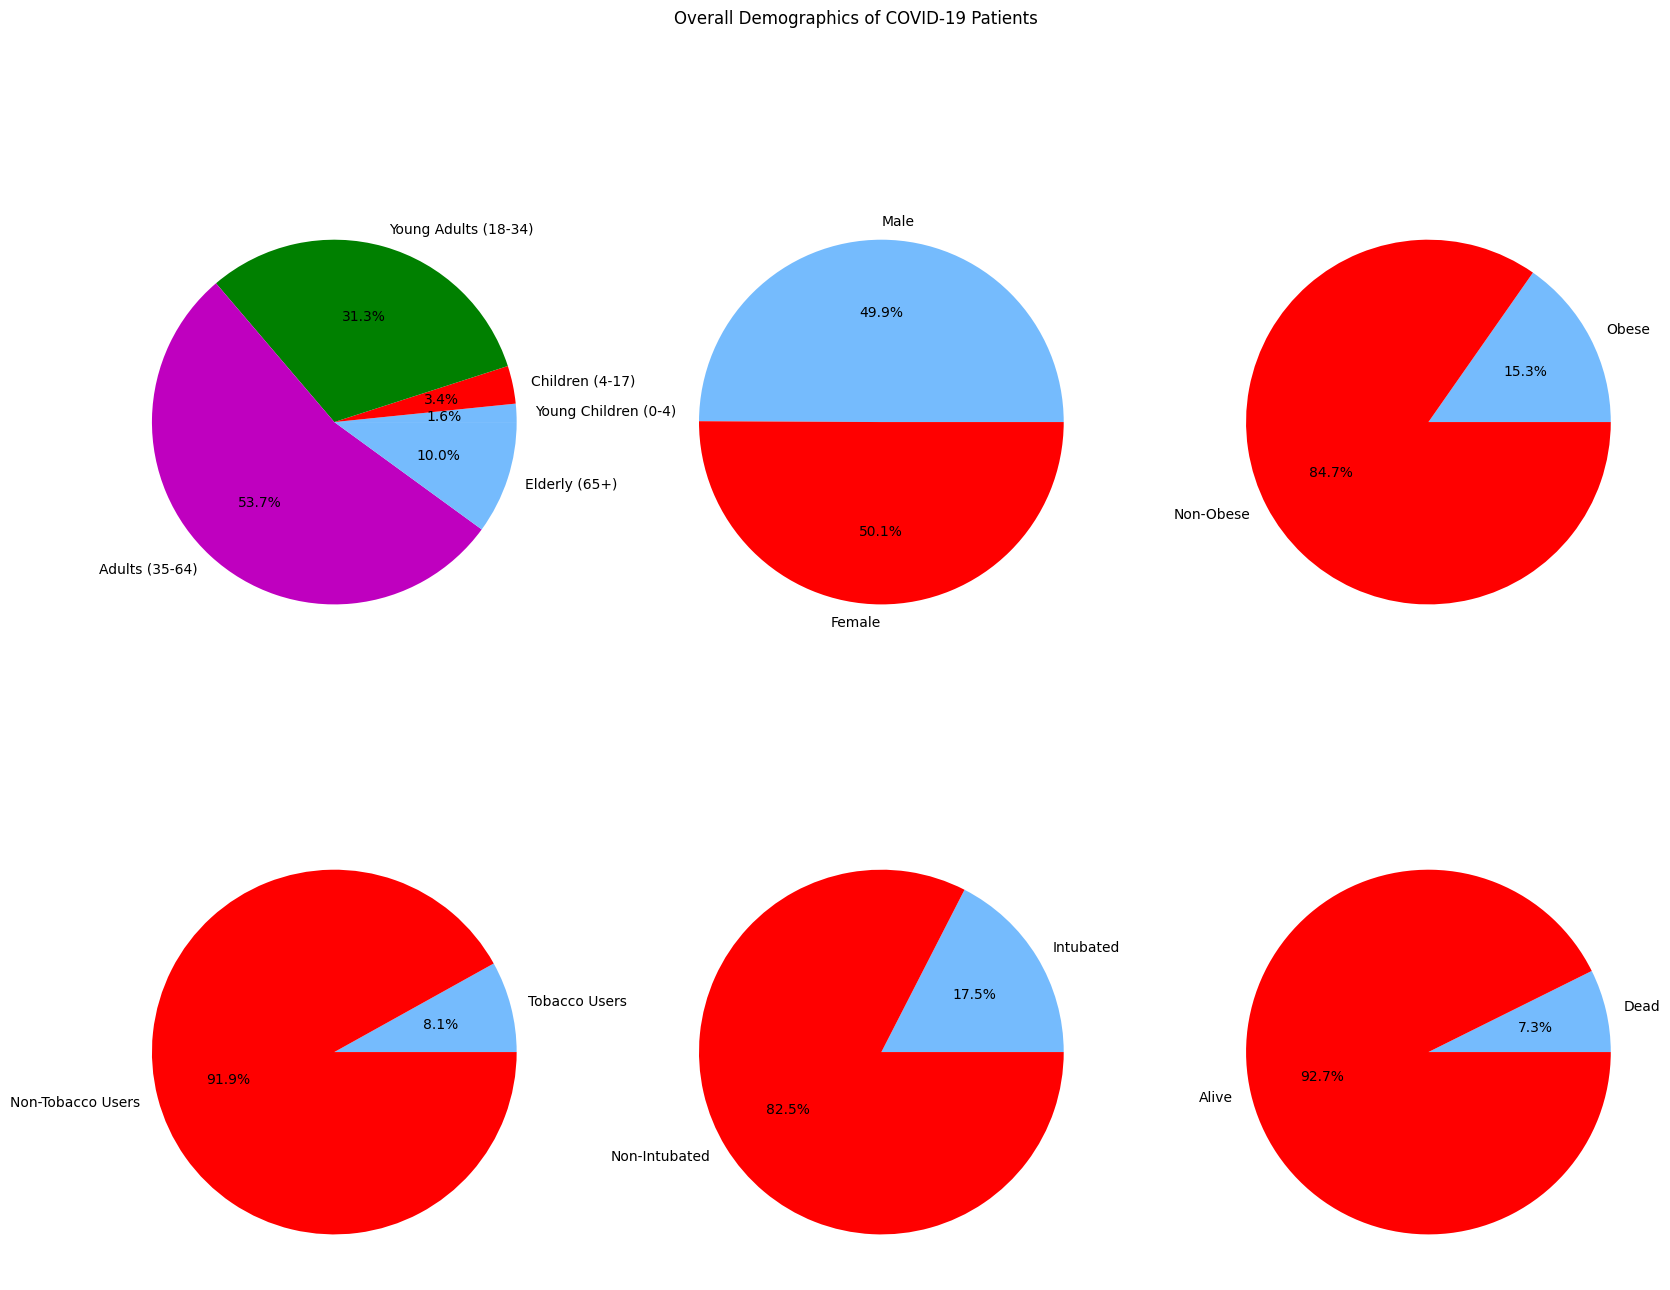

In [129]:
# Data Plots
#figure, axes = plt.subplots(len(X.columns) // 5, 5)
#figure.set_size_inches(20,30)

#axes = axes.reshape(len(X.columns)) # This treats axes as a 1D array, so we can iterate over it

#sb.stripplot(x="CLASSIFICATION_FINAL", y="AGE", data=data, jitter=True, legend=False, hue="CLASSIFICATION_FINAL", palette="Set2")
# TODO: we should probably just graph age demographics, sex, obesity, and tobacco users as a percentage of intubated patients and dead patients

young_children = data['AGE'] < 5
children = np.logical_and(18 > data['AGE'], data['AGE'] > 5)
young_adults = np.logical_and(35 > data['AGE'], data['AGE'] >= 18)
adults = np.logical_and(65 > data['AGE'], data['AGE'] >= 35)
elderly = data['AGE'] >= 65

females = data["SEX"] == 1
males = data["SEX"] == 2

obese = data["OBESITY"] == 1
non_obese = data["OBESITY"] == 2

tobacco_users = data["TOBACCO"] == 1
non_tobacco_users = data["TOBACCO"] == 2

intubated = data["INTUBED"] == 1
non_intubated = data["INTUBED"] == 2

dead = data["DATE_DIED"].notna()
alive = data["DATE_DIED"].isna()

age_groups = {
    "Young Children (0-4)": young_children,
    "Children (4-17)": children,
    "Young Adults (18-34)": young_adults,
    "Adults (35-64)": adults,
    "Elderly (65+)": elderly
}

sexes = {
    "Male": males,
    "Female": females
}

obesity = {
    "Obese": obese,
    "Non-Obese": non_obese
}

tobacco = {
    "Tobacco Users": tobacco_users,
    "Non-Tobacco Users": non_tobacco_users
}

intubation = {
    "Intubated": intubated,
    "Non-Intubated": non_intubated
}

death = {
    "Dead": dead,
    "Alive": alive
}

figure, axes = plt.subplots(2, 3, figsize=(20, 15))
ax = axes.ravel()

figure.suptitle("Overall Demographics of COVID-19 Patients")

for i, d in enumerate([age_groups, sexes, obesity, tobacco, intubation, death]):
    ax[i].pie(
        [len(data[cond]) for cond in d.values()],
        labels=d.keys(),
        autopct='%1.1f%%',
        colors=['xkcd:sky blue','r','g','m'])

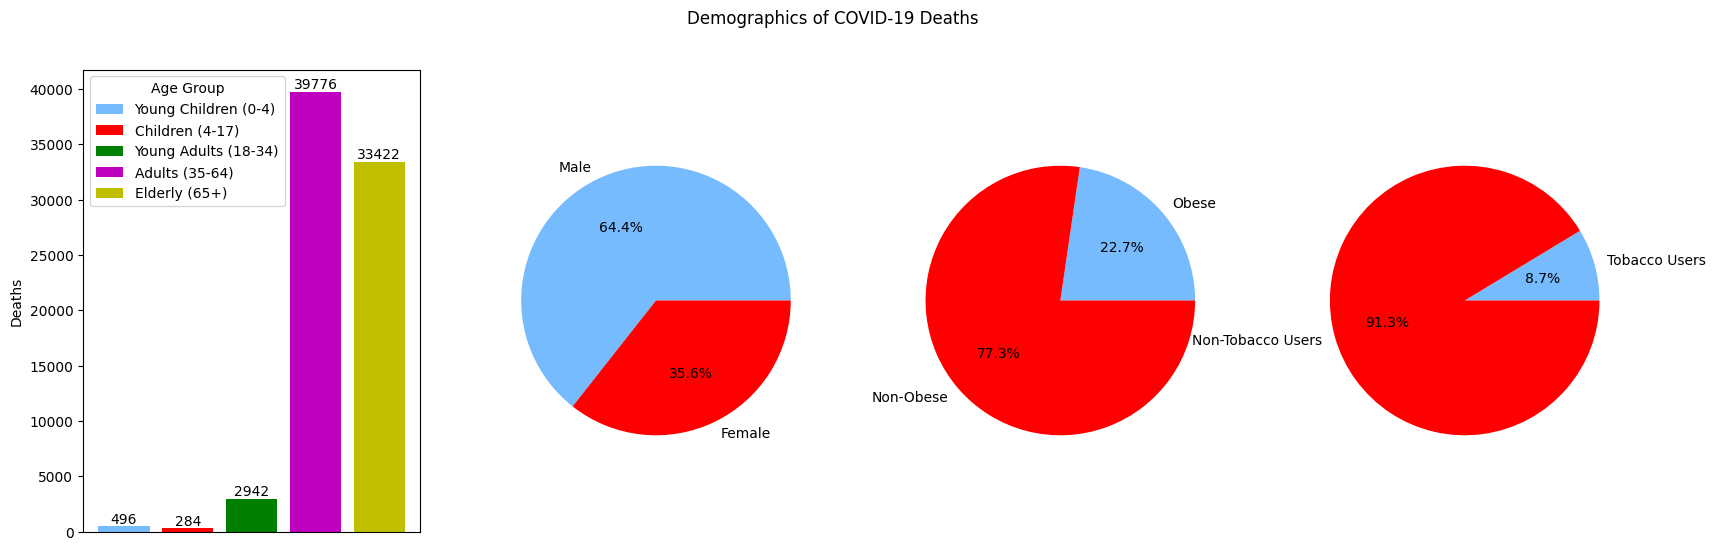

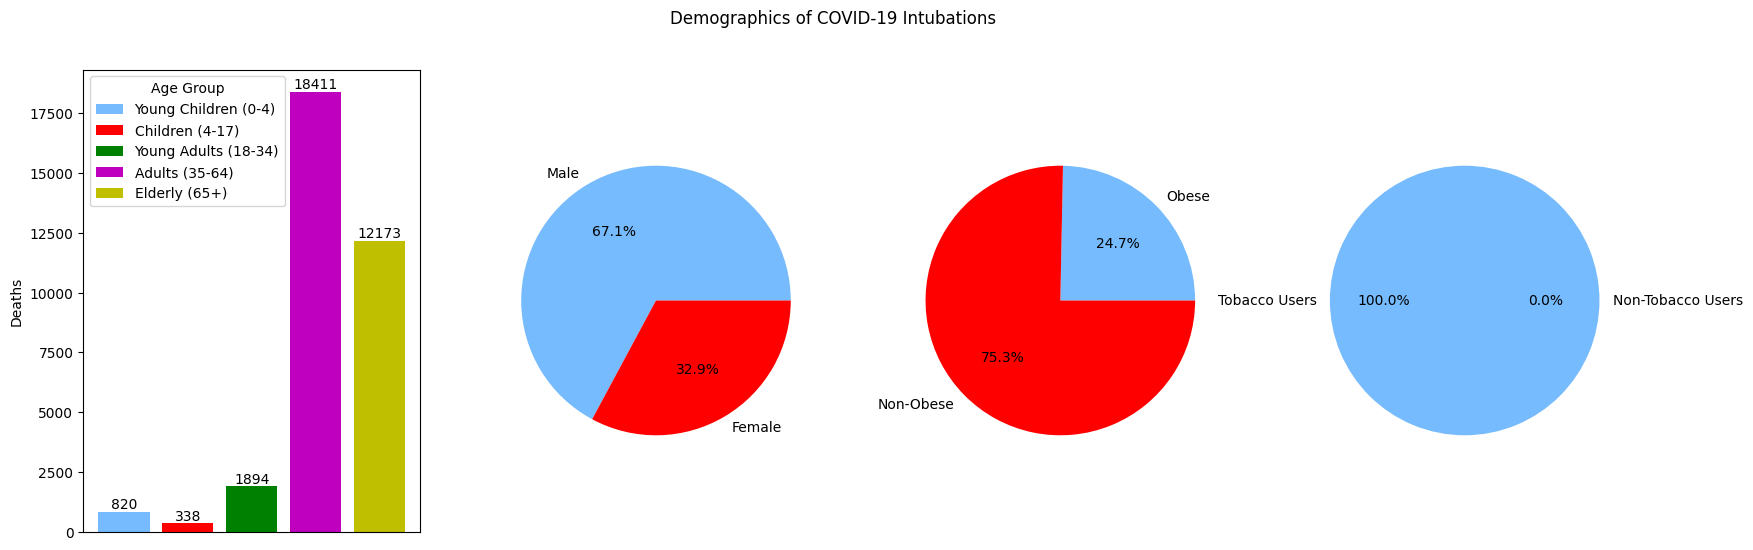

In [159]:
# Overall demographics of dead and intubated patients
figure, axes = plt.subplots(1, 4, figsize=(20, 6))
ax = axes.ravel()

figure.suptitle("Demographics of COVID-19 Deaths")

ax[0].bar(age_groups.keys(), [len(data[dead & cond]) for cond in age_groups.values()], color=['xkcd:sky blue','r','g','m', 'y'], label=age_groups.keys())
ax[0].set_ylabel('Deaths')
ax[0].get_xaxis().set_ticks([])
ax[0].legend(labels=age_groups.keys(), title='Age Group')
ax[0].bar_label(ax[0].containers[0])

for i, d in enumerate([sexes, obesity, tobacco]):
    ax[1+i].pie(
        [len(data[dead & cond]) for cond in d.values()],
        labels=d.keys(),
        autopct='%1.1f%%',
        colors=['xkcd:sky blue','r','g','m'])

figure, axes = plt.subplots(1, 4, figsize=(20, 6))
ax = axes.ravel()

figure.suptitle("Demographics of COVID-19 Intubations")

ax[0].bar(age_groups.keys(), [len(data[intubated & cond]) for cond in age_groups.values()], color=['xkcd:sky blue','r','g','m', 'y'], label=age_groups.keys())
ax[0].set_ylabel('Deaths')
ax[0].get_xaxis().set_ticks([])
ax[0].legend(labels=age_groups.keys(), title='Age Group')
ax[0].bar_label(ax[0].containers[0])

for i, d in enumerate([sexes, obesity, tobacco]):
    ax[1+i].pie(
        [len(data[tobacco_users & cond]) for cond in d.values()],
        labels=d.keys(),
        autopct='%1.1f%%',
        colors=['xkcd:sky blue','r','g','m'])

<Axes: >

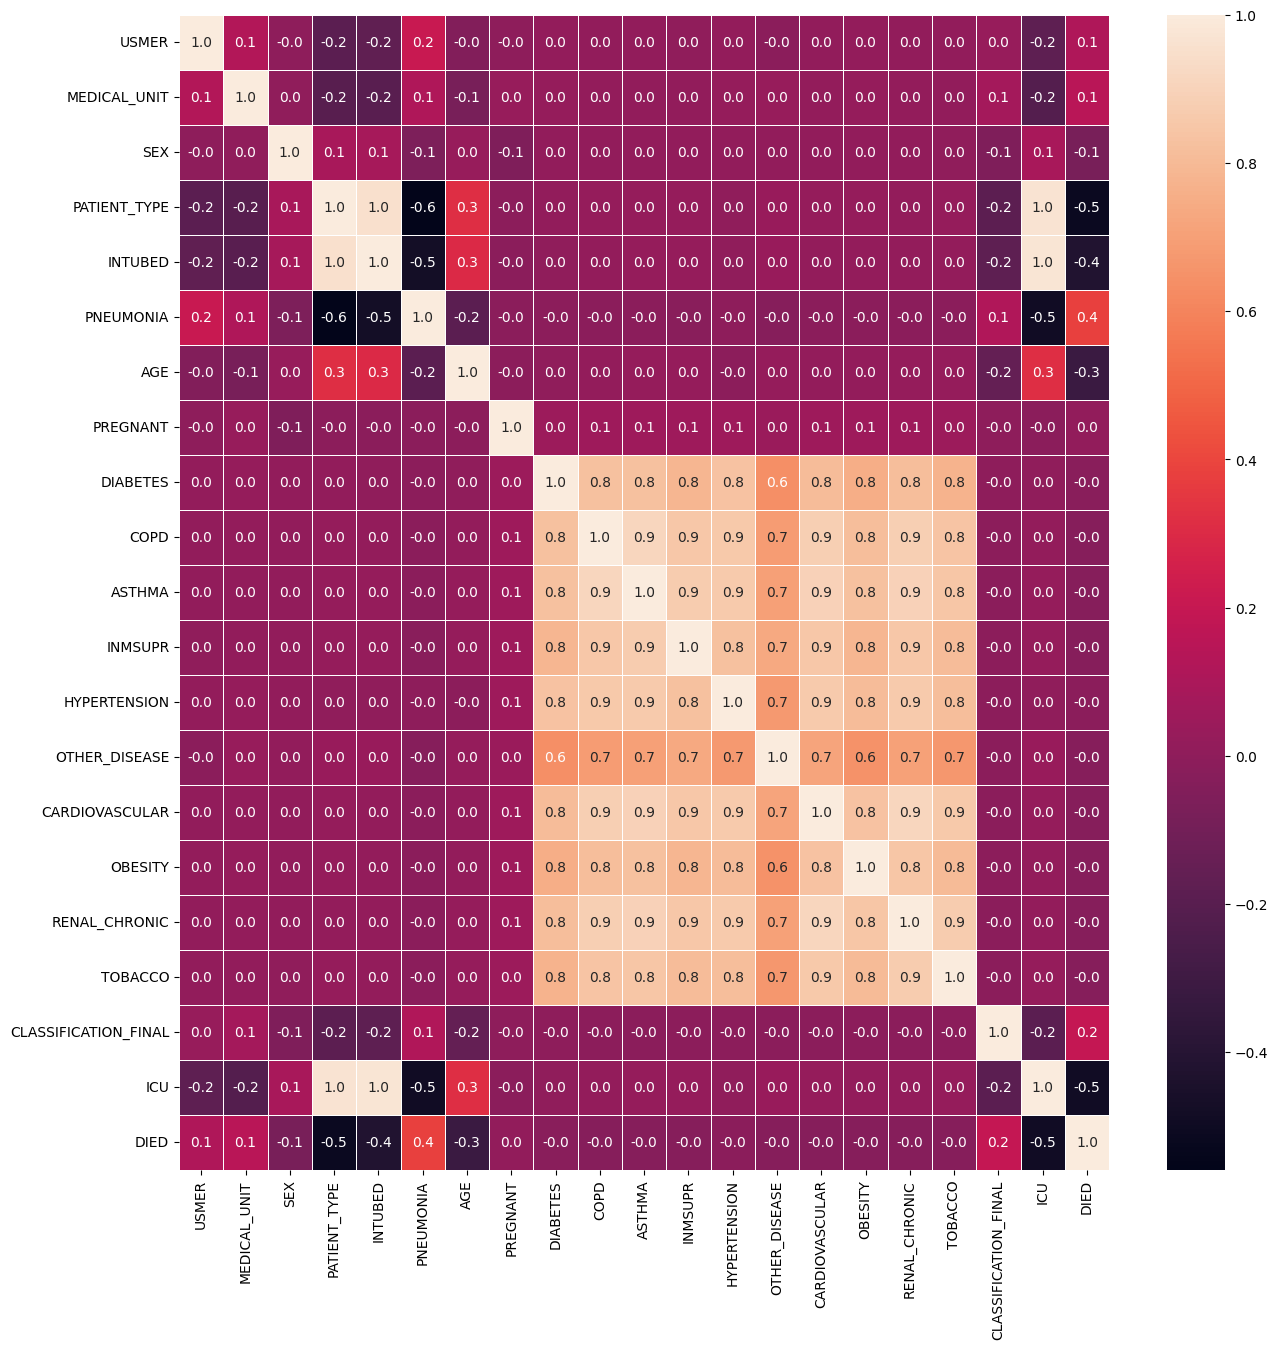

In [160]:
plt.figure(figsize=(15, 15))
correlation_matrix = pd.get_dummies(data.assign(DIED=data["DATE_DIED"].isna()).drop('DATE_DIED', axis=1).corr())
sb.heatmap(correlation_matrix, annot=True, linewidth=.5, fmt='.1f')

In [161]:
# Perform train-test split
from sklearn.model_selection import train_test_split

y = data['CLASSIFICATION_FINAL'].copy()
X = pd.get_dummies(data.drop('CLASSIFICATION_FINAL', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
592908,1,12,2,1,NaT,0,2,29,2,1,2,2,2,2,2,2,1,2,2,0
184386,2,4,2,1,NaT,0,2,27,2,2,2,2,2,1,2,2,2,2,2,0
1021782,2,12,2,1,NaT,0,2,25,2,2,2,2,2,2,2,2,2,2,2,0
59606,1,4,1,1,NaT,0,2,26,2,2,2,2,2,2,2,2,1,2,1,0
93792,1,4,1,2,NaT,2,2,46,2,1,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963395,1,12,1,1,NaT,0,2,62,2,2,2,2,2,2,2,2,2,2,1,0
117952,1,4,2,1,NaT,0,2,23,2,2,2,2,2,2,2,2,2,2,1,0
435829,2,10,2,1,NaT,0,2,34,2,2,2,2,2,2,2,2,2,2,2,0
305711,1,4,1,1,NaT,0,2,24,2,2,2,2,2,2,2,2,2,2,2,0


In [162]:
# Every column except AGE and DATE_DIED is a binary variable, so we only need to standardize those columns
# We also need to cast the datetime columns to int64 to standardize them
scaled_X_train = sk.preprocessing.StandardScaler().fit_transform(X_train[['AGE', 'DATE_DIED']].astype("int64"))
print("Mean:", scaled_X_train.mean()) # Mean is not exactly 0 due to floating point errors
print("Variance:", scaled_X_train.var()) # Variance is not exactly 1 due to floating point errors
scaled_X_train

Mean: -7.484898479862792e-16
Variance: 0.9999999999999996


array([[-0.7567611 , -0.28137806],
       [-0.87499344, -0.28137806],
       [-0.99322578, -0.28137806],
       ...,
       [-0.46118025, -0.28137806],
       [-1.05234194, -0.28137806],
       [-0.34294792, -0.28137806]])